In [1]:
import os
import xarray as xr
import glob
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.dates as mdates
from mpl_toolkits.basemap import Basemap
import cmocean
import numpy as np
import cartopy.crs as ccrs
import cartopy as cartopy
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
from scipy.stats import linregress
import statsmodels.api as sm

# change the directory to the folder that includes all the JRA reanalysis datasets
dir_cp_eke = r'C:\Users\xliu38\OneDrive - University of Tasmania\Honours Research Project\Matlab code for Meander analysis\CP_GEOS_data'
os.chdir(dir_cp_eke)

In [2]:
# Open the surface geostrophic current velocity data products

# ugeos product
ugeos_1993_2002 = xr.open_dataset('Cam_Plat_Ugeos_19930101_20020101.nc')
ugeos_2002_2011 = xr.open_dataset('Cam_Plat_Ugeos_20020102_20110101.nc')
ugeos_2011_2020 = xr.open_dataset('Cam_Plat_Ugeos_20110102_20200531.nc')

# vgeos product
vgeos_1993_2002 = xr.open_dataset('Cam_Plat_Vgeos_19930101_20020101.nc')
vgeos_2002_2011 = xr.open_dataset('Cam_Plat_Vgeos_20020102_20110101.nc')
vgeos_2011_2020 = xr.open_dataset('Cam_Plat_Vgeos_20110102_20200531.nc')

In [3]:
# Check the velocity file
ugeos_2002_2011

<xarray.Dataset>
Dimensions:    (time: 3287, latitude: 161, longitude: 240)
Coordinates:
  * time       (time) datetime64[ns] 2002-01-02 2002-01-03 ... 2011-01-01
  * latitude   (latitude) float32 -69.88 -69.62 -69.38 ... -30.38 -30.12 -29.88
  * longitude  (longitude) float32 150.1 150.4 150.6 150.9 ... 209.4 209.6 209.9
Data variables:
    ugos       (time, latitude, longitude) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    time_coverage_duration:          P1D
    time_coverage_end:               2020-06-03T00:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2020-06-03T00:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...
    History:                         Translated to CF-1.0 Conventions by Netc...

In [4]:
# Concate the zonal and meridional velocity products along their time dimension
ugeos_1993_2020 = xr.concat([ugeos_1993_2002, ugeos_2002_2011, ugeos_2011_2020], dim='time')

In [5]:
vgeos_1993_2020 = xr.concat([vgeos_1993_2002, vgeos_2002_2011, vgeos_2011_2020], dim='time')

In [6]:
# Check the concated result
vgeos_1993_2020

<xarray.Dataset>
Dimensions:    (time: 10013, latitude: 161, longitude: 240)
Coordinates:
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2020-05-31
  * latitude   (latitude) float32 -69.88 -69.62 -69.38 ... -30.38 -30.12 -29.88
  * longitude  (longitude) float32 150.1 150.4 150.6 150.9 ... 209.4 209.6 209.9
Data variables:
    vgos       (time, latitude, longitude) float64 nan nan ... -0.1084 -0.0306
Attributes: (12/45)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    time_coverage_duration:          P1D
    time_coverage_end:               2020-06-03T00:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2020-06-03T00:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...
    History:                         Translated to CF-1.0 Conventions by Netc...

In [7]:
# Specify the ugeos and vgeos variable within the two velocity files

ugeos_1993_2020_u = ugeos_1993_2020.ugos
vgeos_1993_2020_v = vgeos_1993_2020.vgos

In [8]:
# Check the actual ugeos and vgeos variable
ugeos_1993_2020_u

<xarray.DataArray 'ugos' (time: 10013, latitude: 161, longitude: 240)>
array([[[    nan,     nan,     nan, ..., -0.0123, -0.0121, -0.012 ],
        [    nan,     nan,     nan, ..., -0.0242, -0.0261, -0.0267],
        [    nan,     nan,     nan, ..., -0.0207, -0.0224, -0.0229],
        ...,
        [    nan,     nan,     nan, ...,  0.0202,  0.0462,  0.077 ],
        [    nan,     nan,     nan, ...,  0.1126,  0.1164,  0.1369],
        [    nan,     nan,     nan, ...,  0.1913,  0.1636,  0.1626]],

       [[    nan,     nan,     nan, ..., -0.0121, -0.0119, -0.0118],
        [    nan,     nan,     nan, ..., -0.0232, -0.0251, -0.0256],
        [    nan,     nan,     nan, ..., -0.0194, -0.0211, -0.0214],
        ...,
        [    nan,     nan,     nan, ...,  0.0271,  0.0501,  0.0757],
        [    nan,     nan,     nan, ...,  0.1137,  0.1157,  0.1304],
        [    nan,     nan,     nan, ...,  0.1842,  0.16  ,  0.1591]],

       [[    nan,     nan,     nan, ..., -0.0121, -0.0121, -0.0121],
        [    nan,     nan,     nan, ..., -0.0236, -0.026 , -0.0267],
        [    nan,     nan,     nan, ..., -0.0197, -0.0219, -0.0225],
        ...,
...
        ...,
        [    nan,     nan,     nan, ...,  0.0292,  0.0813,  0.1232],
        [    nan,     nan,     nan, ...,  0.0351,  0.0646,  0.0699],
        [    nan,     nan,     nan, ...,  0.0764,  0.0666,  0.0291]],

       [[    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        ...,
        [    nan,     nan,     nan, ...,  0.0353,  0.086 ,  0.1241],
        [    nan,     nan,     nan, ...,  0.0394,  0.0662,  0.066 ],
        [    nan,     nan,     nan, ...,  0.0788,  0.0658,  0.0233]],

       [[    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        ...,
        [    nan,     nan,     nan, ...,  0.0387,  0.0877,  0.1237],
        [    nan,     nan,     nan, ...,  0.0407,  0.0676,  0.0637],
        [    nan,     nan,     nan, ...,  0.0784,  0.0646,  0.0186]]])
Coordinates:
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2020-05-31
  * latitude   (latitude) float32 -69.88 -69.62 -69.38 ... -30.38 -30.12 -29.88
  * longitude  (longitude) float32 150.1 150.4 150.6 150.9 ... 209.4 209.6 209.9
Attributes:
    grid_mapping:   crs
    long_name:      Absolute geostrophic velocity: zonal component
    standard_name:  surface_geostrophic_eastward_sea_water_velocity
    units:          m/s
    _ChunkSizes:    [ 1 50 50]

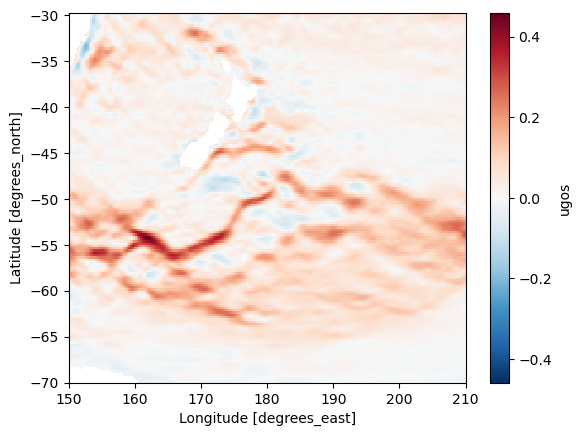

In [9]:
# Test plot of the daily ugeos and vgeos
ugeos_1993_2020_u.mean(dim='time').plot()

In [10]:
# Calculate the 1993-2020 mean ugeos and vgeos
ugeos_1993_2020_u_avg_time = ugeos_1993_2020_u.mean(dim='time')
vgeos_1993_2020_v_avg_time = vgeos_1993_2020_v.mean(dim='time')

In [11]:
# Calculate the anomaly of ugeos and vgeos relative to the 1993-2020 ugeos and vgeos mean
ugeos_1993_2020_u_minus_avg = ugeos_1993_2020_u - ugeos_1993_2020_u_avg_time
vgeos_1993_2020_v_minus_avg = vgeos_1993_2020_v - vgeos_1993_2020_v_avg_time

In [12]:
# Calculate the eddy kinetic energy using the zonal and meridional velocity anomalies above
eke_1993_2020_day = 0.5 * (ugeos_1993_2020_u_minus_avg ** 2 + vgeos_1993_2020_v_minus_avg ** 2)

In [13]:
eke_1993_2020_day

<xarray.DataArray (time: 10013, latitude: 161, longitude: 240)>
array([[[           nan,            nan,            nan, ...,
         8.64405081e-05, 8.76690653e-05, 2.74007672e-06],
        [           nan,            nan,            nan, ...,
         1.07605853e-04, 1.11155180e-04, 2.86883792e-05],
        [           nan,            nan,            nan, ...,
         9.20890523e-05, 9.59745607e-05, 2.70633375e-05],
        ...,
        [           nan,            nan,            nan, ...,
         3.99481000e-03, 4.23590759e-03, 1.40543296e-03],
        [           nan,            nan,            nan, ...,
         2.74483473e-03, 3.21113770e-03, 2.49018835e-03],
        [           nan,            nan,            nan, ...,
         1.17491619e-02, 7.53366559e-03, 5.06242958e-03]],

       [[           nan,            nan,            nan, ...,
         8.95186690e-05, 9.08016412e-05, 3.22819645e-06],
        [           nan,            nan,            nan, ...,
         1.04036775e-04, 1.07029723e-04, 2.08996166e-05],
        [           nan,            nan,            nan, ...,
         8.66264474e-05, 8.98372764e-05, 1.70593026e-05],
...
        [           nan,            nan,            nan, ...,
         1.24993168e-03, 3.21101914e-03, 6.24755157e-03],
        [           nan,            nan,            nan, ...,
         4.16847365e-03, 7.34497128e-03, 4.48517561e-03],
        [           nan,            nan,            nan, ...,
         4.60468914e-03, 6.60096361e-03, 1.88730676e-03]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        ...,
        [           nan,            nan,            nan, ...,
         1.33690933e-03, 3.54419882e-03, 6.62080689e-03],
        [           nan,            nan,            nan, ...,
         4.40234638e-03, 7.56368811e-03, 4.52783227e-03],
        [           nan,            nan,            nan, ...,
         4.94542729e-03, 6.55492543e-03, 1.86524698e-03]]])
Coordinates:
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2020-05-31
  * latitude   (latitude) float32 -69.88 -69.62 -69.38 ... -30.38 -30.12 -29.88
  * longitude  (longitude) float32 150.1 150.4 150.6 150.9 ... 209.4 209.6 209.9

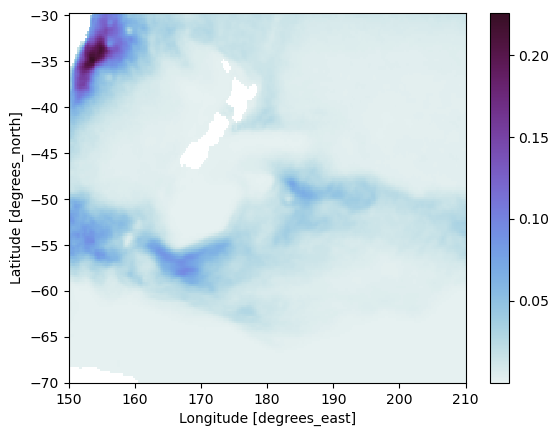

In [14]:
# Test plot of the EKE: 1993-2020 mean EKE:
# This should be the first subplot of the EKE comprehensive figure: spatial distribution of the temporal mean EKE over the 1993-2020 period

eke_1993_2020_day.mean(dim=['time']).plot(cmap='cmo.dense')

In [15]:
# Specify the daily time variable
eke_1993_2020_day_time = eke_1993_2020_day.time
eke_1993_2020_day_time

<xarray.DataArray 'time' (time: 10013)>
array(['1993-01-01T00:00:00.000000000', '1993-01-02T00:00:00.000000000',
       '1993-01-03T00:00:00.000000000', ..., '2020-05-29T00:00:00.000000000',
       '2020-05-30T00:00:00.000000000', '2020-05-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2020-05-31
Attributes:
    axis:                 T
    long_name:            Time
    standard_name:        time
    _ChunkSizes:          1
    _CoordinateAxisType:  Time

In [16]:
# Convert the DataArray to a pandas DataFrame to facilitate datetime manipulation
df_eke_1993_2020_day_time = eke_1993_2020_day_time.to_dataframe()

# Set the index to the time dimension for resampling
df_eke_1993_2020_day_time.set_index('time', inplace=True)

# Resample the time series to monthly frequency, starting on the 15th of the month
df_eke_1993_2020_day_time_mon = df_eke_1993_2020_day_time.resample('MS').asfreq()

# Adjust the index to the 15th of each month
df_eke_1993_2020_day_time_mon.index = df_eke_1993_2020_day_time_mon.index + pd.offsets.MonthBegin(0)

# Convert the DataFrame back to a DataArray
eke_1993_2020_time_mon = df_eke_1993_2020_day_time_mon.to_xarray()

# Print the monthly time series DataArray
eke_1993_2020_time_mon

<xarray.Dataset>
Dimensions:  (time: 329)
Coordinates:
  * time     (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2020-05-01
Data variables:
    *empty*

In [17]:
# Convert the eke_monthly_time_series Dataset to DataArray by selecting a variable (e.g., 'time')
eke_1993_2020_time_mon_arr = eke_1993_2020_time_mon['time']

# Find the corresponding indices of the matching elements in the original DataArray
mask_eke_day_mon = eke_1993_2020_day_time.isin(eke_1993_2020_time_mon_arr)
ind_eke_day_mon = np.where(mask_eke_day_mon)[0]

# Print the matching indices
print(ind_eke_day_mon)

[   0   31   59   90  120  151  181  212  243  273  304  334  365  396
  424  455  485  516  546  577  608  638  669  699  730  761  789  820
  850  881  911  942  973 1003 1034 1064 1095 1126 1155 1186 1216 1247
 1277 1308 1339 1369 1400 1430 1461 1492 1520 1551 1581 1612 1642 1673
 1704 1734 1765 1795 1826 1857 1885 1916 1946 1977 2007 2038 2069 2099
 2130 2160 2191 2222 2250 2281 2311 2342 2372 2403 2434 2464 2495 2525
 2556 2587 2616 2647 2677 2708 2738 2769 2800 2830 2861 2891 2922 2953
 2981 3012 3042 3073 3103 3134 3165 3195 3226 3256 3287 3318 3346 3377
 3407 3438 3468 3499 3530 3560 3591 3621 3652 3683 3711 3742 3772 3803
 3833 3864 3895 3925 3956 3986 4017 4048 4077 4108 4138 4169 4199 4230
 4261 4291 4322 4352 4383 4414 4442 4473 4503 4534 4564 4595 4626 4656
 4687 4717 4748 4779 4807 4838 4868 4899 4929 4960 4991 5021 5052 5082
 5113 5144 5172 5203 5233 5264 5294 5325 5356 5386 5417 5447 5478 5509
 5538 5569 5599 5630 5660 5691 5722 5752 5783 5813 5844 5875 5903 5934
 5964 

In [18]:
# Average the eke over each month during the 1993-2020 period
x_months = 4 # Choose the avaeraging month period
x_days = 2*np.floor(x_months*30.417/2) # Calculate the corresponding days

# For each month: make a running sum of the flag values over x_days 
eke_1993_2020_mon_mean = np.full((len(ind_eke_day_mon), len(eke_1993_2020_day.latitude), len(eke_1993_2020_day.longitude)), np.nan)

# The loop below is used for a running sum of the flag values over x_days
for i in range(int(np.floor(x_months/2+1)), len(ind_eke_day_mon)-int(np.floor(x_months/2))+1, 1):
    
    eke_1993_2020_mon_mean[i, :, :] = np.average(eke_1993_2020_day[ind_eke_day_mon[i]-int(x_days/2-1):ind_eke_day_mon[i]+int(x_days/2), :, :], 0)

In [19]:
np.shape(eke_1993_2020_mon_mean)

(329, 161, 240)

In [20]:
eke_1993_2020_mon_mean = xr.DataArray(eke_1993_2020_mon_mean)
eke_1993_2020_mon_mean

<xarray.DataArray (dim_0: 329, dim_1: 161, dim_2: 240)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [       nan,        nan,        nan, ..., 0.00860706,
         0.0069478 , 0.00535467],
        [       nan,        nan,        nan, ..., 0.00900963,
         0.00888991, 0.00916563],
        [       nan,        nan,        nan, ..., 0.01024128,
         0.01139852, 0.01192035]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]])
Dimensions without coordinates: dim_0, dim_1, dim_2

In [21]:
# Remove the second and third dimensions of the monthly mean wind speed variables; Add new coordinates and attributes
# Three coordinates: initial_time1_months g0_lat_1 g0_lon_2
eke_1993_2020_mon_mean = eke_1993_2020_mon_mean.assign_coords(
    dict(
        time=("dim_0", eke_1993_2020_time_mon_arr.data),
        latitude=("dim_1", eke_1993_2020_day.latitude.data),
        longitude=("dim_2", eke_1993_2020_day.longitude.data)
    )
)

eke_1993_2020_mon_mean = eke_1993_2020_mon_mean.rename(
    {"dim_0": "time", "dim_1": "latitude", "dim_2": "longitude"}
)

In [22]:
# Chcck the result
eke_1993_2020_mon_mean

<xarray.DataArray (time: 329, latitude: 161, longitude: 240)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [       nan,        nan,        nan, ..., 0.00860706,
         0.0069478 , 0.00535467],
        [       nan,        nan,        nan, ..., 0.00900963,
         0.00888991, 0.00916563],
        [       nan,        nan,        nan, ..., 0.01024128,
         0.01139852, 0.01192035]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]])
Coordinates:
  * time       (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2020-05-01
  * latitude   (latitude) float32 -69.88 -69.62 -69.38 ... -30.38 -30.12 -29.88
  * longitude  (longitude) float32 150.1 150.4 150.6 150.9 ... 209.4 209.6 209.9

In [23]:
# Set the longitude and latitude ranges of the Campbell Plateau region
lat_cp = [-57, -46]

# Set the longitude ranges of different sections of the Campbell Plateau region
lon_wh = [150, 210]
lon_up = [150, 158.4]
lon_pl = [158.4, 184.4]
lon_dw = [184.4, 210]
lon_fl = [191.6, 204.9]

In [24]:
# Specify the EKE within the CP region and other four sections

# Whole meander
eke_1993_2020_mon_mean_wh = eke_1993_2020_mon_mean.where(np.logical_and(
        (eke_1993_2020_mon_mean.longitude >= lon_wh[0]),
        (eke_1993_2020_mon_mean.longitude <= lon_wh[1])
    ) & # longitude
    
    np.logical_and(
        (eke_1993_2020_mon_mean.latitude >= lat_cp[0]),
        (eke_1993_2020_mon_mean.latitude <= lat_cp[1])
    ), # latitude
    
    drop=True
)

In [25]:
eke_1993_2020_mon_mean_wh

<xarray.DataArray (time: 329, latitude: 44, longitude: 240)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [0.01290483, 0.01316074, 0.01121117, ..., 0.0029932 ,
         0.00385764, 0.00492002],
        [0.01744633, 0.01998928, 0.0205034 , ..., 0.00137726,
         0.00176952, 0.00207034],
        [0.01389707, 0.01832401, 0.02083666, ..., 0.00113242,
         0.0016619 , 0.00218786]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]])
Coordinates:
  * longitude  (longitude) float64 150.1 150.4 150.6 150.9 ... 209.4 209.6 209.9
  * latitude   (latitude) float64 -56.88 -56.62 -56.38 ... -46.62 -46.38 -46.12
  * time       (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2020-05-01

In [26]:
# Then apply to other four sections of the CP region

# Upstream section
eke_1993_2020_mon_mean_up = eke_1993_2020_mon_mean.where(np.logical_and(
        (eke_1993_2020_mon_mean.longitude >= lon_up[0]),
        (eke_1993_2020_mon_mean.longitude <= lon_up[1])
    ) & # longitude
    
    np.logical_and(
        (eke_1993_2020_mon_mean.latitude >= lat_cp[0]),
        (eke_1993_2020_mon_mean.latitude <= lat_cp[1])
    ), # latitude
    
    drop=True
)

# Plateau section
eke_1993_2020_mon_mean_pl = eke_1993_2020_mon_mean.where(np.logical_and(
        (eke_1993_2020_mon_mean.longitude >= lon_pl[0]),
        (eke_1993_2020_mon_mean.longitude <= lon_pl[1])
    ) & # longitude
    
    np.logical_and(
        (eke_1993_2020_mon_mean.latitude >= lat_cp[0]),
        (eke_1993_2020_mon_mean.latitude <= lat_cp[1])
    ), # latitude
    
    drop=True
)

# Downstream section
eke_1993_2020_mon_mean_dw = eke_1993_2020_mon_mean.where(np.logical_and(
        (eke_1993_2020_mon_mean.longitude >= lon_dw[0]),
        (eke_1993_2020_mon_mean.longitude <= lon_dw[1])
    ) & # longitude
    
    np.logical_and(
        (eke_1993_2020_mon_mean.latitude >= lat_cp[0]),
        (eke_1993_2020_mon_mean.latitude <= lat_cp[1])
    ), # latitude
    
    drop=True
)

# flat region
eke_1993_2020_mon_mean_fl = eke_1993_2020_mon_mean.where(np.logical_and(
        (eke_1993_2020_mon_mean.longitude >= lon_fl[0]),
        (eke_1993_2020_mon_mean.longitude <= lon_fl[1])
    ) & # longitude
    
    np.logical_and(
        (eke_1993_2020_mon_mean.latitude >= lat_cp[0]),
        (eke_1993_2020_mon_mean.latitude <= lat_cp[1])
    ), # latitude
    
    drop=True
)

In [27]:
# Average the EKE over the entire time period for different sections

eke_1993_2020_mon_mean_wh_avg_tim = eke_1993_2020_mon_mean_wh.mean(dim=['time'])
eke_1993_2020_mon_mean_up_avg_tim = eke_1993_2020_mon_mean_up.mean(dim=['time'])
eke_1993_2020_mon_mean_pl_avg_tim = eke_1993_2020_mon_mean_pl.mean(dim=['time'])
eke_1993_2020_mon_mean_dw_avg_tim = eke_1993_2020_mon_mean_dw.mean(dim=['time'])
eke_1993_2020_mon_mean_fl_avg_tim = eke_1993_2020_mon_mean_fl.mean(dim=['time'])

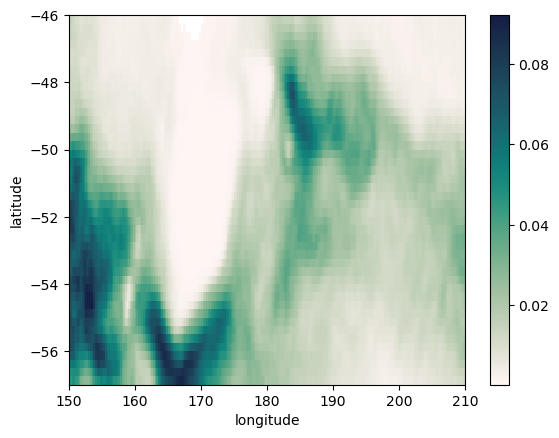

In [28]:
# Test plot
eke_1993_2020_mon_mean_wh_avg_tim.plot(cmap='cmo.tempo')

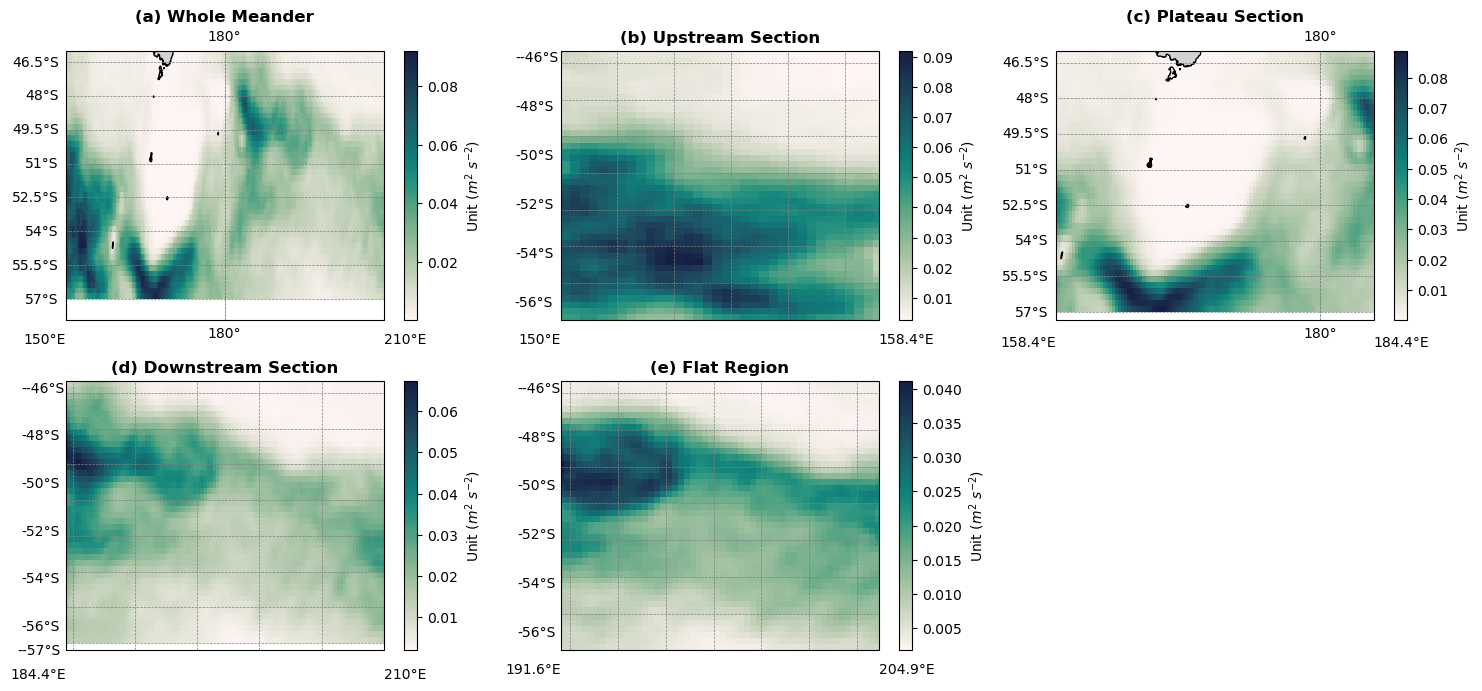

In [26]:
# Plot the spatial distribution of these temporal-mean monthly EKE in different sections

fig = plt.figure(figsize=(15, 7))  # Increased the figure size

# Whole Meander
ax1 = fig.add_subplot(2, 3, 1, projection=ccrs.PlateCarree(central_longitude=180))
ax1.set_extent([lon_wh[0], lon_wh[1], lat_cp[0]+2.5, lat_cp[1]])
ax1.coastlines(resolution='10m')
ax1.add_feature(cfeature.LAND, facecolor='lightgray')
ax1.gridlines(draw_labels=True, linewidth=0.5, linestyle='--', color='gray')
ax1.text(lon_wh[0], -58.5, f'{lon_wh[0]}°E', transform=ccrs.PlateCarree(), ha='right', va='top', color='black')
ax1.text(lon_wh[1], -58.5, f'{lon_wh[1]}°E', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')

eke_1993_2020_mon_mean_wh_avg_tim.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='cmo.tempo', add_colorbar=True, cbar_kwargs={'label': r'Unit ($m^2$ $s^{-2}$)'})
ax1.set_title('(a) Whole Meander', fontweight='bold')
ax1.set_aspect('auto')  # Adjust the aspect ratio of the subplot


# Upstream Section
ax2 = fig.add_subplot(2, 3, 2, projection=ccrs.PlateCarree(central_longitude=180))
ax2.set_extent([lon_up[0], lon_up[1], lat_cp[0], lat_cp[1]])
ax2.coastlines(resolution='10m')
ax2.add_feature(cfeature.LAND, facecolor='lightgray')
ax2.gridlines(draw_labels=False, linewidth=0.5, linestyle='--', color='gray')
ax2.text(lon_up[0], -57.5, f'{lon_up[0]}°E', transform=ccrs.PlateCarree(), ha='right', va='top', color='black')
ax2.text(lon_up[1], -57.5, f'{lon_up[1]}°E', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')
ax2.text(149.8, -56, f'-{56}°S', transform=ccrs.PlateCarree(), ha='right', va='top', color='black')
ax2.text(148.8, lat_cp[1], f'-{lat_cp[1]}°S', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')
ax2.text(148.8, -54, f'-{54}°S', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')
ax2.text(148.8, -52, f'-{52}°S', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')
ax2.text(148.8, -50, f'-{50}°S', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')
ax2.text(148.8, -48, f'-{48}°S', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')

eke_1993_2020_mon_mean_up_avg_tim.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='cmo.tempo', add_colorbar=True, cbar_kwargs={'label': r'Unit ($m^2$ $s^{-2}$)'})
ax2.set_title('(b) Upstream Section', fontweight='bold')
ax2.set_aspect('auto')  # Adjust the aspect ratio of the subplot


# Plateau Section
ax3 = fig.add_subplot(2, 3, 3, projection=ccrs.PlateCarree(central_longitude=180))
ax3.set_extent([lon_pl[0], lon_pl[1], lat_cp[0], lat_cp[1]])
ax3.coastlines(resolution='10m')
ax3.add_feature(cfeature.LAND, facecolor='lightgray')
ax3.gridlines(draw_labels=True, linewidth=0.5, linestyle='--', color='gray')
ax3.text(lon_pl[0], -58, f'{lon_pl[0]}°E', transform=ccrs.PlateCarree(), ha='right', va='top', color='black')
ax3.text(lon_pl[1], -58, f'{lon_pl[1]}°E', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')

eke_1993_2020_mon_mean_pl_avg_tim.plot(ax=ax3, transform=ccrs.PlateCarree(), cmap='cmo.tempo', add_colorbar=True, cbar_kwargs={'label': r'Unit ($m^2$ $s^{-2}$)'})
ax3.set_title('(c) Plateau Section', fontweight='bold')
ax3.set_aspect('auto')  # Adjust the aspect ratio of the subplot


# Downstream section
ax4 = fig.add_subplot(2, 3, 4, projection=ccrs.PlateCarree(central_longitude=180))
ax4.set_extent([lon_dw[0], lon_dw[1], lat_cp[0], lat_cp[1]])
ax4.coastlines(resolution='10m')
ax4.add_feature(cfeature.LAND, facecolor='lightgray')
ax4.gridlines(draw_labels=False, linewidth=0.5, linestyle='--', color='gray')
ax4.text(lon_dw[0], -58, f'{lon_dw[0]}°E', transform=ccrs.PlateCarree(), ha='right', va='top', color='black')
ax4.text(lon_dw[1], -58, f'{lon_dw[1]}°E', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')
ax4.text(184, lat_cp[0], f'-{lat_cp[0]}°S', transform=ccrs.PlateCarree(), ha='right', va='top', color='black')
ax4.text(180.8, lat_cp[1], f'-{lat_cp[1]}°S', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')
ax4.text(180.8, -56, f'-{56}°S', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')
ax4.text(180.8, -54, f'-{54}°S', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')
ax4.text(180.8, -52, f'-{52}°S', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')
ax4.text(180.8, -50, f'-{50}°S', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')
ax4.text(180.8, -48, f'-{48}°S', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')

eke_1993_2020_mon_mean_dw_avg_tim.plot(ax=ax4, transform=ccrs.PlateCarree(), cmap='cmo.tempo', add_colorbar=True, cbar_kwargs={'label': r'Unit ($m^2$ $s^{-2}$)'})
ax4.set_title('(d) Downstream Section', fontweight='bold')
ax4.set_aspect('auto')  # Adjust the aspect ratio of the subplot


# Flat region
ax5 = fig.add_subplot(2, 3, 5, projection=ccrs.PlateCarree(central_longitude=180))
ax5.set_extent([lon_fl[0], lon_fl[1], lat_cp[0], lat_cp[1]])
ax5.coastlines(resolution='10m')
ax5.add_feature(cfeature.LAND, facecolor='lightgray')
ax5.gridlines(draw_labels=False, linewidth=0.5, linestyle='--', color='gray')
ax5.text(lon_fl[0], -57.5, f'{lon_fl[0]}°E', transform=ccrs.PlateCarree(), ha='right', va='top', color='black')
ax5.text(lon_fl[1], -57.5, f'{lon_fl[1]}°E', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')
ax5.text(189.8, lat_cp[1], f'-{lat_cp[1]}°S', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')
ax5.text(189.8, -56, f'-{56}°S', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')
ax5.text(189.8, -54, f'-{54}°S', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')
ax5.text(189.8, -52, f'-{52}°S', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')
ax5.text(189.8, -50, f'-{50}°S', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')
ax5.text(189.8, -48, f'-{48}°S', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')

eke_1993_2020_mon_mean_fl_avg_tim.plot(ax=ax5, transform=ccrs.PlateCarree(), cmap='cmo.tempo', add_colorbar=True, cbar_kwargs={'label': r'Unit ($m^2$ $s^{-2}$)'})
ax5.set_title('(e) Flat Region', fontweight='bold')
ax5.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax5.set_xlabel('')


# Adjust the layout
plt.tight_layout()


# Show the plot
plt.show()

# Save the figure
#fig.savefig(f'CP_region_1993_2020_mean_EKE_spa_dis.png', dpi=600, bbox_inches='tight')

Text(0, 0.5, 'Latitude')

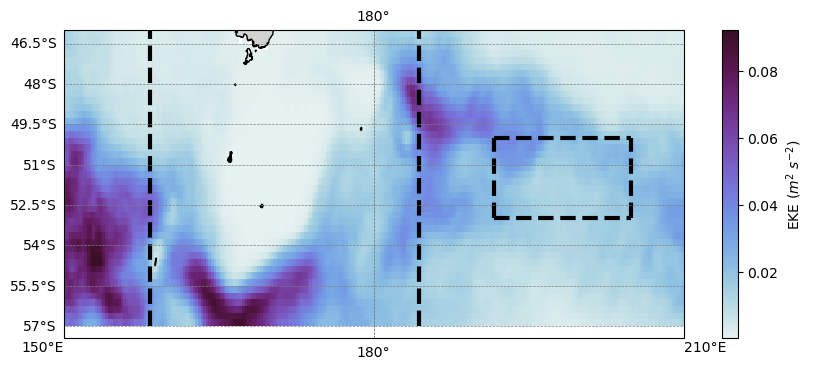

In [29]:
fig = plt.figure(figsize=(10, 4))  # Increased the figure size

# Whole Meander
ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))
ax1.set_extent([lon_wh[0], lon_wh[1], lat_cp[0]+3, lat_cp[1]])
ax1.coastlines(resolution='10m')
ax1.add_feature(cfeature.LAND, facecolor='lightgray')
ax1.gridlines(draw_labels=True, linewidth=0.5, linestyle='--', color='gray')
ax1.text(lon_wh[0], -57.5, f'{lon_wh[0]}°E', transform=ccrs.PlateCarree(), ha='right', va='top', color='black')
ax1.text(lon_wh[1], -57.5, f'{lon_wh[1]}°E', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')

eke_1993_2020_mon_mean_wh_avg_tim.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='cmo.dense', add_colorbar=True, cbar_kwargs={'label': r'EKE ($m^2$ $s^{-2}$)'})
ax1.set_title('')
ax1.set_aspect('auto')  # Adjust the aspect ratio of the subplot

# Plot the longitude boundaries between the different sections
ax1.plot([158.4, 158.4], [-57, -46], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax1.plot([184.4, 184.4], [-57, -46], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream

# Plot the longitude and latitude boundaries of the Flat Region
ax1.plot([191.6, 191.6], [-53, -50], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax1.plot([204.9, 204.9], [-53, -50], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream
ax1.plot([191.6, 204.9], [-50, -50], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax1.plot([191.6, 204.9], [-53, -53], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream

ax1.set_xlabel('Longitude', fontsize=12)
ax1.set_ylabel('Latitude', fontsize=12)

# Save the figure
#fig.savefig(f'CP_region_1993_2020_mean_EKE_spa_dis_V2.png', dpi=600, bbox_inches='tight')

In [30]:
# Average the EKE in different sections over the whole longitude and latitude
eke_1993_2020_mon_mean_wh_avg_lon_lat = eke_1993_2020_mon_mean_wh.mean(dim=['longitude', 'latitude'])
eke_1993_2020_mon_mean_up_avg_lon_lat = eke_1993_2020_mon_mean_up.mean(dim=['longitude', 'latitude'])
eke_1993_2020_mon_mean_pl_avg_lon_lat = eke_1993_2020_mon_mean_pl.mean(dim=['longitude', 'latitude'])
eke_1993_2020_mon_mean_dw_avg_lon_lat = eke_1993_2020_mon_mean_dw.mean(dim=['longitude', 'latitude'])
eke_1993_2020_mon_mean_fl_avg_lon_lat = eke_1993_2020_mon_mean_fl.mean(dim=['longitude', 'latitude'])

In [31]:
# Check the result
eke_1993_2020_mon_mean_wh_avg_lon_lat

<xarray.DataArray (time: 329)>
array([       nan,        nan,        nan, 0.01825127, 0.01783621,
       0.01659272, 0.01616012, 0.01589166, 0.01581834, 0.01615454,
       0.01612474, 0.01567703, 0.01486874, 0.01390745, 0.01410595,
       0.01488353, 0.01561506, 0.01645919, 0.0165889 , 0.0167229 ,
       0.01710402, 0.01773389, 0.01830296, 0.01942713, 0.02101642,
       0.02144501, 0.02133234, 0.02040589, 0.01906607, 0.01905942,
       0.01937495, 0.01956734, 0.01967559, 0.01884905, 0.01810763,
       0.01797587, 0.01783007, 0.01791489, 0.01834313, 0.01825583,
       0.01845798, 0.01843716, 0.01824526, 0.01830624, 0.01840443,
       0.01894534, 0.01912935, 0.01939052, 0.01953025, 0.01984228,
       0.02011732, 0.02002943, 0.0189736 , 0.01817738, 0.01747469,
       0.01703478, 0.01670237, 0.01616671, 0.01573531, 0.01600493,
       0.0168175 , 0.01716453, 0.01745235, 0.01802468, 0.01832624,
       0.01832764, 0.01826963, 0.0172081 , 0.01733436, 0.01869999,
       0.02047417, 0.02185623, 0.02253013, 0.02248172, 0.02264824,
       0.02233372, 0.02109103, 0.02007765, 0.01964532, 0.02038558,
       0.02181736, 0.02242243, 0.02249011, 0.02212905, 0.02126467,
       0.02084244, 0.02018386, 0.01999175, 0.02075564, 0.02092426,
       0.02183928, 0.02260505, 0.02280359, 0.02348334, 0.02298214,
       0.02213512, 0.02148563, 0.02061991, 0.02014887, 0.02005588,
...
       0.01919362, 0.0187425 , 0.02004887, 0.02129787, 0.02175132,
       0.02248143, 0.02185058, 0.02158794, 0.02160696, 0.0208301 ,
       0.01975625, 0.01894329, 0.01880483, 0.01871754, 0.01911924,
       0.01997856, 0.02098069, 0.02218263, 0.02305675, 0.02299771,
       0.02216333, 0.02155288, 0.02123726, 0.02150527, 0.02205898,
       0.02203477, 0.02128703, 0.02097906, 0.02163514, 0.02232826,
       0.02291518, 0.0227385 , 0.02244516, 0.02263286, 0.02250835,
       0.02209786, 0.02045546, 0.0189187 , 0.01846622, 0.01807677,
       0.0187403 , 0.01992176, 0.02048963, 0.0211521 , 0.02116241,
       0.01966656, 0.01845754, 0.01774234, 0.01762624, 0.01872888,
       0.01991294, 0.02056686, 0.02057828, 0.02035819, 0.02044508,
       0.0206599 , 0.02110258, 0.02121127, 0.02044233, 0.01957343,
       0.01893379, 0.01889568, 0.01903351, 0.01948782, 0.02012287,
       0.02071836, 0.02098328, 0.02060301, 0.02006812, 0.02065692,
       0.02167899, 0.02286343, 0.02331819, 0.02258498, 0.02228049,
       0.02130028, 0.02089417, 0.02041478, 0.02056002, 0.02125938,
       0.02233918, 0.02266507, 0.02258211, 0.02215764, 0.02108901,
       0.02064975, 0.01950151, 0.01894024, 0.01935776, 0.01964866,
       0.01991913, 0.0200792 , 0.01951907, 0.01895017, 0.0190531 ,
       0.01962451, 0.02003268, 0.02028743,        nan])
Coordinates:
  * time     (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2020-05-01

In [32]:
# Replace NaN values with np.nan to effectively remove them from the DataArray
#eke_1993_2020_mon_mean_wh_avg_lon_lat_no_nan = eke_1993_2020_mon_mean_wh_avg_lon_lat.where(~np.isnan(eke_1993_2020_mon_mean_wh_avg_lon_lat), np.nan)

# Alternatively, you can use the .dropna() method to remove NaN values
eke_1993_2020_mon_mean_wh_avg_lon_lat_no_nan = eke_1993_2020_mon_mean_wh_avg_lon_lat.dropna(dim='time', how='any')

In [33]:
# Check the NAN-removed result
eke_1993_2020_mon_mean_wh_avg_lon_lat_no_nan

<xarray.DataArray (time: 325)>
array([0.01825127, 0.01783621, 0.01659272, 0.01616012, 0.01589166,
       0.01581834, 0.01615454, 0.01612474, 0.01567703, 0.01486874,
       0.01390745, 0.01410595, 0.01488353, 0.01561506, 0.01645919,
       0.0165889 , 0.0167229 , 0.01710402, 0.01773389, 0.01830296,
       0.01942713, 0.02101642, 0.02144501, 0.02133234, 0.02040589,
       0.01906607, 0.01905942, 0.01937495, 0.01956734, 0.01967559,
       0.01884905, 0.01810763, 0.01797587, 0.01783007, 0.01791489,
       0.01834313, 0.01825583, 0.01845798, 0.01843716, 0.01824526,
       0.01830624, 0.01840443, 0.01894534, 0.01912935, 0.01939052,
       0.01953025, 0.01984228, 0.02011732, 0.02002943, 0.0189736 ,
       0.01817738, 0.01747469, 0.01703478, 0.01670237, 0.01616671,
       0.01573531, 0.01600493, 0.0168175 , 0.01716453, 0.01745235,
       0.01802468, 0.01832624, 0.01832764, 0.01826963, 0.0172081 ,
       0.01733436, 0.01869999, 0.02047417, 0.02185623, 0.02253013,
       0.02248172, 0.02264824, 0.02233372, 0.02109103, 0.02007765,
       0.01964532, 0.02038558, 0.02181736, 0.02242243, 0.02249011,
       0.02212905, 0.02126467, 0.02084244, 0.02018386, 0.01999175,
       0.02075564, 0.02092426, 0.02183928, 0.02260505, 0.02280359,
       0.02348334, 0.02298214, 0.02213512, 0.02148563, 0.02061991,
       0.02014887, 0.02005588, 0.02009146, 0.02056   , 0.02109684,
...
       0.02151851, 0.02056248, 0.01919362, 0.0187425 , 0.02004887,
       0.02129787, 0.02175132, 0.02248143, 0.02185058, 0.02158794,
       0.02160696, 0.0208301 , 0.01975625, 0.01894329, 0.01880483,
       0.01871754, 0.01911924, 0.01997856, 0.02098069, 0.02218263,
       0.02305675, 0.02299771, 0.02216333, 0.02155288, 0.02123726,
       0.02150527, 0.02205898, 0.02203477, 0.02128703, 0.02097906,
       0.02163514, 0.02232826, 0.02291518, 0.0227385 , 0.02244516,
       0.02263286, 0.02250835, 0.02209786, 0.02045546, 0.0189187 ,
       0.01846622, 0.01807677, 0.0187403 , 0.01992176, 0.02048963,
       0.0211521 , 0.02116241, 0.01966656, 0.01845754, 0.01774234,
       0.01762624, 0.01872888, 0.01991294, 0.02056686, 0.02057828,
       0.02035819, 0.02044508, 0.0206599 , 0.02110258, 0.02121127,
       0.02044233, 0.01957343, 0.01893379, 0.01889568, 0.01903351,
       0.01948782, 0.02012287, 0.02071836, 0.02098328, 0.02060301,
       0.02006812, 0.02065692, 0.02167899, 0.02286343, 0.02331819,
       0.02258498, 0.02228049, 0.02130028, 0.02089417, 0.02041478,
       0.02056002, 0.02125938, 0.02233918, 0.02266507, 0.02258211,
       0.02215764, 0.02108901, 0.02064975, 0.01950151, 0.01894024,
       0.01935776, 0.01964866, 0.01991913, 0.0200792 , 0.01951907,
       0.01895017, 0.0190531 , 0.01962451, 0.02003268, 0.02028743])
Coordinates:
  * time     (time) datetime64[ns] 1993-04-01 1993-05-01 ... 2020-04-01

In [34]:
# Apply to other four sections of the meander
eke_1993_2020_mon_mean_up_avg_lon_lat_no_nan = eke_1993_2020_mon_mean_up_avg_lon_lat.dropna(dim='time', how='any')
eke_1993_2020_mon_mean_pl_avg_lon_lat_no_nan = eke_1993_2020_mon_mean_pl_avg_lon_lat.dropna(dim='time', how='any')
eke_1993_2020_mon_mean_dw_avg_lon_lat_no_nan = eke_1993_2020_mon_mean_dw_avg_lon_lat.dropna(dim='time', how='any')
eke_1993_2020_mon_mean_fl_avg_lon_lat_no_nan = eke_1993_2020_mon_mean_fl_avg_lon_lat.dropna(dim='time', how='any')

Text(8200, 0.0225, 'R²=0.17')

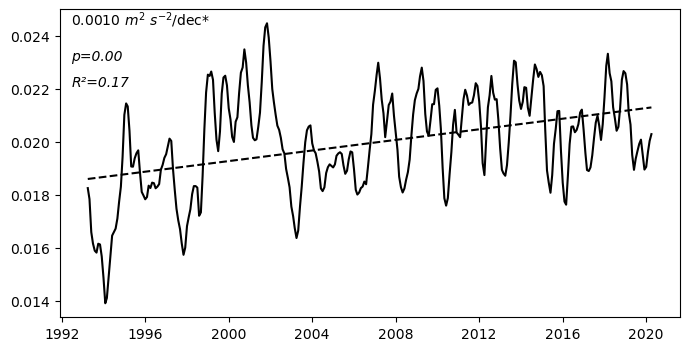

In [35]:
fig = plt.figure(figsize=(8, 4))  # Increased the figure size

ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(eke_1993_2020_mon_mean_wh_avg_lon_lat_no_nan.time, eke_1993_2020_mon_mean_wh_avg_lon_lat_no_nan, c='black', label='Whole Meander')

# Whole Meander: 
# Perform linear regression
slope_eke_1993_2020_mon_mean_wh, intercept_eke_1993_2020_mon_mean_wh,\
r_eke_1993_2020_mon_mean_wh, p_eke_1993_2020_mon_mean_wh,\
std_err_eke_1993_2020_mon_mean_wh = linregress(eke_1993_2020_mon_mean_wh_avg_lon_lat_no_nan.time.astype('float64'), eke_1993_2020_mon_mean_wh_avg_lon_lat_no_nan)

# Calculate regression line
reg_eke_1993_2020_mon_mean_wh = slope_eke_1993_2020_mon_mean_wh * eke_1993_2020_mon_mean_wh_avg_lon_lat_no_nan.time.astype('float64') + intercept_eke_1993_2020_mon_mean_wh

# Calculate R-squared value
r_squ_eke_1993_2020_mon_mean_wh = r_eke_1993_2020_mon_mean_wh ** 2

ax1.plot(eke_1993_2020_mon_mean_wh_avg_lon_lat_no_nan.time, reg_eke_1993_2020_mon_mean_wh, c='black', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_eke_1993_2020_mon_mean_wh_str = '{:.4f} $m^2$ $s^{{-2}}$/dec*'.format(slope_eke_1993_2020_mon_mean_wh*3.1536e+16*10)
p_eke_1993_2020_mon_mean_wh_str = 'p={:.2f}'.format(p_eke_1993_2020_mon_mean_wh)
r_squ_eke_1993_2020_mon_mean_wh_str = 'R\u00b2={:.2f}'.format(r_squ_eke_1993_2020_mon_mean_wh)

ax1.text(8200, 0.025, slope_eke_1993_2020_mon_mean_wh_str, ha='left', va='top', color='black', fontsize=10)
ax1.text(8200, 0.0235, p_eke_1993_2020_mon_mean_wh_str, ha='left', va='top', color='black', fontstyle='italic', fontsize=10)
ax1.text(8200, 0.0225, r_squ_eke_1993_2020_mon_mean_wh_str, ha='left', va='top', color='black', fontstyle='italic', fontsize=10)

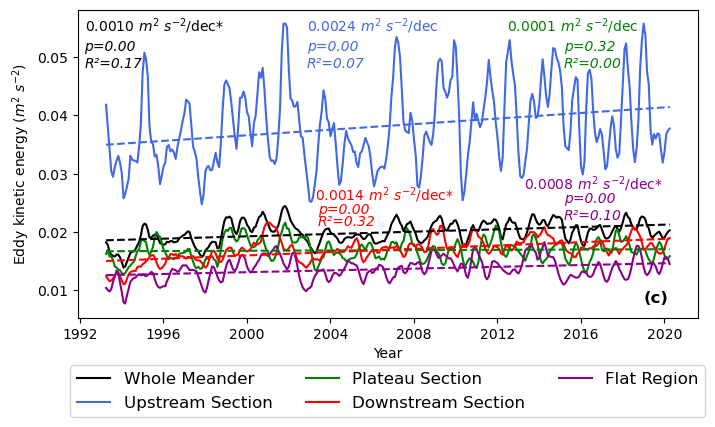

In [36]:
fig = plt.figure(figsize=(8, 4))  # Increased the figure size

# Zonal component of the wind velocities
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(eke_1993_2020_mon_mean_wh_avg_lon_lat_no_nan.time, eke_1993_2020_mon_mean_wh_avg_lon_lat_no_nan, c='black', label='Whole Meander')
ax1.plot(eke_1993_2020_mon_mean_up_avg_lon_lat_no_nan.time, eke_1993_2020_mon_mean_up_avg_lon_lat_no_nan, c='royalblue', label='Upstream Section')
ax1.plot(eke_1993_2020_mon_mean_pl_avg_lon_lat_no_nan.time, eke_1993_2020_mon_mean_pl_avg_lon_lat_no_nan, c='green', label='Plateau Section')
ax1.plot(eke_1993_2020_mon_mean_dw_avg_lon_lat_no_nan.time, eke_1993_2020_mon_mean_dw_avg_lon_lat_no_nan, c='red', label='Downstream Section')
ax1.plot(eke_1993_2020_mon_mean_fl_avg_lon_lat_no_nan.time, eke_1993_2020_mon_mean_fl_avg_lon_lat_no_nan, c='darkmagenta', label='Flat Region')


# Do the linear regression for the whole meander and its four sections

# Whole Meander: 
# Perform linear regression
slope_eke_1993_2020_mon_mean_wh, intercept_eke_1993_2020_mon_mean_wh,\
r_eke_1993_2020_mon_mean_wh, p_eke_1993_2020_mon_mean_wh,\
std_err_eke_1993_2020_mon_mean_wh = linregress(eke_1993_2020_mon_mean_wh_avg_lon_lat_no_nan.time.astype('float64'), eke_1993_2020_mon_mean_wh_avg_lon_lat_no_nan)

# Calculate regression line
reg_eke_1993_2020_mon_mean_wh = slope_eke_1993_2020_mon_mean_wh * eke_1993_2020_mon_mean_wh_avg_lon_lat_no_nan.time.astype('float64') + intercept_eke_1993_2020_mon_mean_wh

# Calculate R-squared value
r_squ_eke_1993_2020_mon_mean_wh = r_eke_1993_2020_mon_mean_wh ** 2

ax1.plot(eke_1993_2020_mon_mean_wh_avg_lon_lat_no_nan.time, reg_eke_1993_2020_mon_mean_wh, c='black', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_eke_1993_2020_mon_mean_wh_str = '{:.4f} $m^2$ $s^{{-2}}$/dec*'.format(slope_eke_1993_2020_mon_mean_wh*3.1536e+16*10)
p_eke_1993_2020_mon_mean_wh_str = 'p={:.2f}'.format(p_eke_1993_2020_mon_mean_wh)
r_squ_eke_1993_2020_mon_mean_wh_str = 'R\u00b2={:.2f}'.format(r_squ_eke_1993_2020_mon_mean_wh)

ax1.text(8130, 0.057, slope_eke_1993_2020_mon_mean_wh_str, ha='left', va='top', color='black', fontsize=10)
ax1.text(8110, 0.053, p_eke_1993_2020_mon_mean_wh_str, ha='left', va='top', color='black', fontstyle='italic', fontsize=10)
ax1.text(8110, 0.05, r_squ_eke_1993_2020_mon_mean_wh_str, ha='left', va='top', color='black', fontstyle='italic', fontsize=10)


# Upstream Section
slope_eke_1993_2020_mon_mean_up, intercept_eke_1993_2020_mon_mean_up,\
r_eke_1993_2020_mon_mean_up, p_eke_1993_2020_mon_mean_up,\
std_err_eke_1993_2020_mon_mean_up = linregress(eke_1993_2020_mon_mean_up_avg_lon_lat_no_nan.time.astype('float64'), eke_1993_2020_mon_mean_up_avg_lon_lat_no_nan)

# Calculate regression line
reg_eke_1993_2020_mon_mean_up = slope_eke_1993_2020_mon_mean_up * eke_1993_2020_mon_mean_up_avg_lon_lat_no_nan.time.astype('float64') + intercept_eke_1993_2020_mon_mean_up

# Calculate R-squared value
r_squ_eke_1993_2020_mon_mean_up = r_eke_1993_2020_mon_mean_up ** 2

ax1.plot(eke_1993_2020_mon_mean_up_avg_lon_lat_no_nan.time, reg_eke_1993_2020_mon_mean_up, c='royalblue', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_eke_1993_2020_mon_mean_up_str = '{:.4f} $m^2$ $s^{{-2}}$/dec'.format(slope_eke_1993_2020_mon_mean_up*3.1536e+16*10)
p_eke_1993_2020_mon_mean_up_str = 'p={:.2f}'.format(p_eke_1993_2020_mon_mean_up)
r_squ_eke_1993_2020_mon_mean_up_str = 'R\u00b2={:.2f}'.format(r_squ_eke_1993_2020_mon_mean_up)

ax1.text(12000, 0.057, slope_eke_1993_2020_mon_mean_up_str, ha='left', va='top', color='royalblue', fontsize=10)
ax1.text(12000, 0.053, p_eke_1993_2020_mon_mean_up_str, ha='left', va='top', color='royalblue', fontstyle='italic', fontsize=10)
ax1.text(12000, 0.05, r_squ_eke_1993_2020_mon_mean_up_str, ha='left', va='top', color='royalblue', fontstyle='italic', fontsize=10)


# Plateau Section
slope_eke_1993_2020_mon_mean_pl, intercept_eke_1993_2020_mon_mean_pl,\
r_eke_1993_2020_mon_mean_pl, p_eke_1993_2020_mon_mean_pl,\
std_err_eke_1993_2020_mon_mean_pl = linregress(eke_1993_2020_mon_mean_pl_avg_lon_lat_no_nan.time.astype('float64'), eke_1993_2020_mon_mean_pl_avg_lon_lat_no_nan)

# Calculate regression line
reg_eke_1993_2020_mon_mean_pl = slope_eke_1993_2020_mon_mean_pl * eke_1993_2020_mon_mean_pl_avg_lon_lat_no_nan.time.astype('float64') + intercept_eke_1993_2020_mon_mean_pl

# Calculate R-squared value
r_squ_eke_1993_2020_mon_mean_pl = r_eke_1993_2020_mon_mean_pl ** 2

ax1.plot(eke_1993_2020_mon_mean_pl_avg_lon_lat_no_nan.time, reg_eke_1993_2020_mon_mean_pl, c='green', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_eke_1993_2020_mon_mean_pl_str = '{:.4f} $m^2$ $s^{{-2}}$/dec'.format(slope_eke_1993_2020_mon_mean_pl*3.1536e+16*10)
p_eke_1993_2020_mon_mean_pl_str = 'p={:.2f}'.format(p_eke_1993_2020_mon_mean_pl)
r_squ_eke_1993_2020_mon_mean_pl_str = 'R\u00b2={:.2f}'.format(r_squ_eke_1993_2020_mon_mean_pl)

ax1.text(15500, 0.057, slope_eke_1993_2020_mon_mean_pl_str, ha='left', va='top', color='green', fontsize=10)
ax1.text(16500, 0.053, p_eke_1993_2020_mon_mean_pl_str, ha='left', va='top', color='green', fontstyle='italic', fontsize=10)
ax1.text(16500, 0.05, r_squ_eke_1993_2020_mon_mean_pl_str, ha='left', va='top', color='green', fontstyle='italic', fontsize=10)


# Downstream Section
slope_eke_1993_2020_mon_mean_dw, intercept_eke_1993_2020_mon_mean_dw,\
r_eke_1993_2020_mon_mean_dw, p_eke_1993_2020_mon_mean_dw,\
std_err_eke_1993_2020_mon_mean_dw = linregress(eke_1993_2020_mon_mean_dw_avg_lon_lat_no_nan.time.astype('float64'), eke_1993_2020_mon_mean_dw_avg_lon_lat_no_nan)

# Calculate regression line
reg_eke_1993_2020_mon_mean_dw = slope_eke_1993_2020_mon_mean_dw * eke_1993_2020_mon_mean_dw_avg_lon_lat_no_nan.time.astype('float64') + intercept_eke_1993_2020_mon_mean_dw

# Calculate R-squared value
r_squ_eke_1993_2020_mon_mean_dw = r_eke_1993_2020_mon_mean_dw ** 2

ax1.plot(eke_1993_2020_mon_mean_dw_avg_lon_lat_no_nan.time, reg_eke_1993_2020_mon_mean_dw, c='red', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_eke_1993_2020_mon_mean_dw_str = '{:.4f} $m^2$ $s^{{-2}}$/dec*'.format(slope_eke_1993_2020_mon_mean_dw*3.1536e+16*10)
p_eke_1993_2020_mon_mean_dw_str = 'p={:.2f}'.format(p_eke_1993_2020_mon_mean_dw)
r_squ_eke_1993_2020_mon_mean_dw_str = 'R\u00b2={:.2f}'.format(r_squ_eke_1993_2020_mon_mean_dw)

ax1.text(12150, 0.028, slope_eke_1993_2020_mon_mean_dw_str, ha='left', va='top', color='red', fontsize=10)
ax1.text(12200, 0.025, p_eke_1993_2020_mon_mean_dw_str, ha='left', va='top', color='red', fontstyle='italic', fontsize=10)
ax1.text(12200, 0.023, r_squ_eke_1993_2020_mon_mean_dw_str, ha='left', va='top', color='red', fontstyle='italic', fontsize=10)


# Flat region
slope_eke_1993_2020_mon_mean_fl, intercept_eke_1993_2020_mon_mean_fl,\
r_eke_1993_2020_mon_mean_fl, p_eke_1993_2020_mon_mean_fl,\
std_err_eke_1993_2020_mon_mean_fl = linregress(eke_1993_2020_mon_mean_fl_avg_lon_lat_no_nan.time.astype('float64'), eke_1993_2020_mon_mean_fl_avg_lon_lat_no_nan)

# Calculate regression line
reg_eke_1993_2020_mon_mean_fl = slope_eke_1993_2020_mon_mean_fl * eke_1993_2020_mon_mean_fl_avg_lon_lat_no_nan.time.astype('float64') + intercept_eke_1993_2020_mon_mean_fl

# Calculate R-squared value
r_squ_eke_1993_2020_mon_mean_fl = r_eke_1993_2020_mon_mean_fl ** 2

ax1.plot(eke_1993_2020_mon_mean_fl_avg_lon_lat_no_nan.time, reg_eke_1993_2020_mon_mean_fl, c='darkmagenta', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_eke_1993_2020_mon_mean_fl_str = '{:.4f} $m^2$ $s^{{-2}}$/dec*'.format(slope_eke_1993_2020_mon_mean_fl*3.1536e+16*10)
p_eke_1993_2020_mon_mean_fl_str = 'p={:.2f}'.format(p_eke_1993_2020_mon_mean_fl)
r_squ_eke_1993_2020_mon_mean_fl_str = 'R\u00b2={:.2f}'.format(r_squ_eke_1993_2020_mon_mean_fl)

ax1.text(15800, 0.03, slope_eke_1993_2020_mon_mean_fl_str, ha='left', va='top', color='darkmagenta', fontsize=10)
ax1.text(16500, 0.027, p_eke_1993_2020_mon_mean_fl_str, ha='left', va='top', color='darkmagenta', fontstyle='italic', fontsize=10)
ax1.text(16500, 0.024, r_squ_eke_1993_2020_mon_mean_fl_str, ha='left', va='top', color='darkmagenta', fontstyle='italic', fontsize=10)

# Add panel (c)
ax1.text(17900, 0.01, '(c)', ha='left', va='top', color='black', fontweight='bold', fontsize=12)

ax1.set_xlabel('Year')
ax1.set_ylabel(r'Eddy kinetic energy ($m^2$ $s^{-2}$)')

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.35), ncol=3, fontsize=12)

# Save the figure
#fig.savefig(f'CP_region_1993_2020_EKE_time-series.png', dpi=600, bbox_inches='tight')

In [37]:
# Specify the monthly mean EKE: eke_1993_2020_mon_mean within the latitude ranges of the Campbell Plateau region

eke_1993_2020_mon_mean_cp = eke_1993_2020_mon_mean.where(
    np.logical_and(
        (eke_1993_2020_mon_mean.latitude >= lat_cp[0]),
        (eke_1993_2020_mon_mean.latitude <= lat_cp[1])
    ), # latitude within the Campbell Plateau region
    
    drop=True
)

eke_1993_2020_mon_mean_cp

<xarray.DataArray (time: 329, latitude: 44, longitude: 240)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [0.01290483, 0.01316074, 0.01121117, ..., 0.0029932 ,
         0.00385764, 0.00492002],
        [0.01744633, 0.01998928, 0.0205034 , ..., 0.00137726,
         0.00176952, 0.00207034],
        [0.01389707, 0.01832401, 0.02083666, ..., 0.00113242,
         0.0016619 , 0.00218786]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]])
Coordinates:
  * latitude   (latitude) float64 -56.88 -56.62 -56.38 ... -46.62 -46.38 -46.12
  * time       (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2020-05-01
  * longitude  (longitude) float32 150.1 150.4 150.6 150.9 ... 209.4 209.6 209.9

In [38]:
len(eke_1993_2020_mon_mean_cp.latitude)

44

In [39]:
# Calculate the spatial distritbuion of the temporal trend of EKE (per year or per decade)
# for each longitiude and latitude point in the whole CP region

# Extract the values of the variable: eke_1993_2020_mon_mean for the loop below
#eke_1993_2020_mon_mean_cp_values = eke_1993_2020_mon_mean_cp.values

# Set up a blank variable that represents the intended EKE temporal trend in each point of the CP region
#eke_1993_2020_mon_mean_cp_values_tre = np.full((len(eke_1993_2020_mon_mean_cp_values.latitude),\
                                                #len(eke_1993_2020_mon_mean_cp_values.longitude), np.nan)
                                               
fill_value = np.nan
eke_1993_2020_mon_mean_cp_tre = np.full((len(eke_1993_2020_mon_mean_cp.latitude), len(eke_1993_2020_mon_mean_cp.longitude)), fill_value)

# Remove the nan values for the loop below
eke_1993_2020_mon_mean_cp_no_nan = eke_1993_2020_mon_mean_cp.where(~np.isnan(eke_1993_2020_mon_mean_cp), drop=True)

In [40]:
# Check the removed nan variable below
eke_1993_2020_mon_mean_cp_no_nan

<xarray.DataArray (time: 325, latitude: 44, longitude: 240)>
array([[[0.0820205 , 0.07908442, 0.07170158, ..., 0.02698153,
         0.02955799, 0.0272658 ],
        [0.06801619, 0.05927913, 0.04464065, ..., 0.01361199,
         0.01384977, 0.01409696],
        [0.07005185, 0.0630944 , 0.05471066, ..., 0.01471161,
         0.01296819, 0.01462848],
        ...,
        [0.03010862, 0.02616564, 0.01768767, ..., 0.00200233,
         0.00192744, 0.00194823],
        [0.02203855, 0.01493798, 0.01640114, ..., 0.0017693 ,
         0.00136991, 0.00163004],
        [0.00973503, 0.00911611, 0.01691077, ..., 0.00573881,
         0.00454594, 0.00246917]],

       [[0.09537974, 0.078407  , 0.05809584, ..., 0.0248666 ,
         0.02846144, 0.03046245],
        [0.07099752, 0.05923576, 0.04054877, ..., 0.01123707,
         0.01162597, 0.0154673 ],
        [0.06171721, 0.05716389, 0.05141089, ..., 0.01208778,
         0.00929825, 0.01220821],
...
        [0.01495847, 0.01934716, 0.02103345, ..., 0.00285803,
         0.00386445, 0.004718  ],
        [0.01391812, 0.02233278, 0.02761306, ..., 0.00152815,
         0.00178596, 0.00163126],
        [0.00902019, 0.01650149, 0.02114418, ..., 0.00117665,
         0.00148108, 0.00242598]],

       [[0.02655404, 0.03149004, 0.02491467, ..., 0.00673928,
         0.00662505, 0.00881307],
        [0.04275432, 0.05568072, 0.06109985, ..., 0.00695081,
         0.00809829, 0.01020152],
        [0.05067699, 0.05682096, 0.07189513, ..., 0.00842237,
         0.00939168, 0.01074321],
        ...,
        [0.01290483, 0.01316074, 0.01121117, ..., 0.0029932 ,
         0.00385764, 0.00492002],
        [0.01744633, 0.01998928, 0.0205034 , ..., 0.00137726,
         0.00176952, 0.00207034],
        [0.01389707, 0.01832401, 0.02083666, ..., 0.00113242,
         0.0016619 , 0.00218786]]])
Coordinates:
  * latitude   (latitude) float64 -56.88 -56.62 -56.38 ... -46.62 -46.38 -46.12
  * time       (time) datetime64[ns] 1993-04-01 1993-05-01 ... 2020-04-01
  * longitude  (longitude) float32 150.1 150.4 150.6 150.9 ... 209.4 209.6 209.9

In [41]:
# Use the foor loops to calcuate the temporal trend for each point in the CP region
for idx_lat in range(0, len(eke_1993_2020_mon_mean_cp_no_nan.latitude)):
    
    for idx_lon in range(0, len(eke_1993_2020_mon_mean_cp_no_nan.longitude)):
        
        eke_1993_2020_mon_mean_cp_no_nan_poi = eke_1993_2020_mon_mean_cp_no_nan[:, idx_lat, idx_lon]
        
        # Add a constant to the time series for the intercept term in the linear regression
        #X = sm.add_constant(np.arange(eke_1993_2020_mon_mean_cp_values_time))
        
        # Perform linear regression to get the trend
        #model = sm.OLS(eke_1993_2020_mon_mean_cp_values_poi, X)
        #results = model.fit()
        
        # Store the trend value for the current latitude and longitude point
        #eke_1993_2020_mon_mean_cp_values_tre[idx_lat, idx_lon] = results.params[0]*3.1536e+16*10
        
        # Remove the nan values in the data variables at that point
        #eke_1993_2020_mon_mean_cp_tre_poi.dropna(dim='time', how='any')
        
        # Do the linear regeression over each point
        
        # eke_1993_2020_mon_mean
        reg_eke_1993_2020_mon_mean_cp_no_nan_tre =\
        linregress(eke_1993_2020_mon_mean_cp_no_nan.time.astype('float64'),\
                   eke_1993_2020_mon_mean_cp_no_nan_poi)
        
        eke_1993_2020_mon_mean_cp_tre[idx_lat, idx_lon] = reg_eke_1993_2020_mon_mean_cp_no_nan_tre.slope

In [42]:
# Check the final result
eke_1993_2020_mon_mean_cp_tre

array([[ 1.13702806e-20,  1.69805811e-20,  1.51205779e-20, ...,
        -1.09754687e-21, -6.46615410e-22, -1.89907957e-21],
       [ 5.78505077e-21,  1.01159963e-20,  1.19136725e-20, ...,
         3.19676826e-23,  1.61058746e-21,  1.73420794e-21],
       [ 9.57781836e-21,  6.64850437e-21,  9.49279735e-21, ...,
         1.89821161e-21,  1.40058749e-21,  4.94532807e-22],
       ...,
       [-2.53357686e-21, -5.93917464e-22,  4.24712372e-22, ...,
        -8.70699601e-22, -1.10213322e-21, -1.06412742e-21],
       [ 1.30388464e-21,  1.61481386e-21,  1.09297864e-21, ...,
        -5.17692941e-22, -6.78856652e-22, -7.09659877e-22],
       [ 3.25898935e-21,  2.99790062e-21,  1.93233026e-21, ...,
        -8.48412130e-22, -1.17968243e-21, -9.00377746e-22]])

In [43]:
# Transform this variable to its xrray.DataArray type

# Create the DataArray
eke_1993_2020_mon_mean_cp_tre = xr.DataArray(
    eke_1993_2020_mon_mean_cp_tre*3.1536e+16*10,
    dims=("latitude", "longitude"),
    coords={"latitude": eke_1993_2020_mon_mean_cp.latitude, "longitude": eke_1993_2020_mon_mean_cp.longitude},
)

# You can also assign a name to the variable if needed
#eke_1993_2020_mon_mean_tre.name = "eke_trend"

# Print the resulting DataArray
eke_1993_2020_mon_mean_cp_tre

<xarray.DataArray (latitude: 44, longitude: 240)>
array([[ 3.58573168e-03,  5.35499604e-03,  4.76842543e-03, ...,
        -3.46122380e-04, -2.03916636e-04, -5.98893734e-04],
       [ 1.82437361e-03,  3.19018061e-03,  3.75709577e-03, ...,
         1.00813284e-05,  5.07914861e-04,  5.46899815e-04],
       [ 3.02046080e-03,  2.09667234e-03,  2.99364857e-03, ...,
         5.98620013e-04,  4.41689270e-04,  1.55955866e-04],
       ...,
       [-7.98988799e-04, -1.87297811e-04,  1.33937294e-04, ...,
        -2.74583826e-04, -3.47568734e-04, -3.35583223e-04],
       [ 4.11193060e-04,  5.09247699e-04,  3.44681743e-04, ...,
        -1.63259646e-04, -2.14084234e-04, -2.23798339e-04],
       [ 1.02775488e-03,  9.45417941e-04,  6.09379671e-04, ...,
        -2.67555249e-04, -3.72024652e-04, -2.83943126e-04]])
Coordinates:
  * latitude   (latitude) float64 -56.88 -56.62 -56.38 ... -46.62 -46.38 -46.12
  * longitude  (longitude) float32 150.1 150.4 150.6 150.9 ... 209.4 209.6 209.9

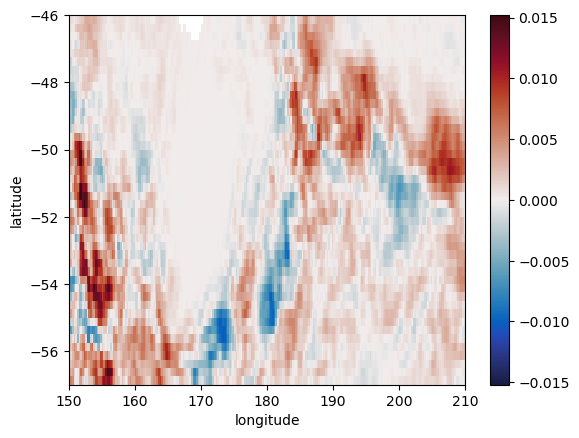

In [44]:
# Plot this newly derived variable
eke_1993_2020_mon_mean_cp_tre.plot(cmap='cmo.balance')

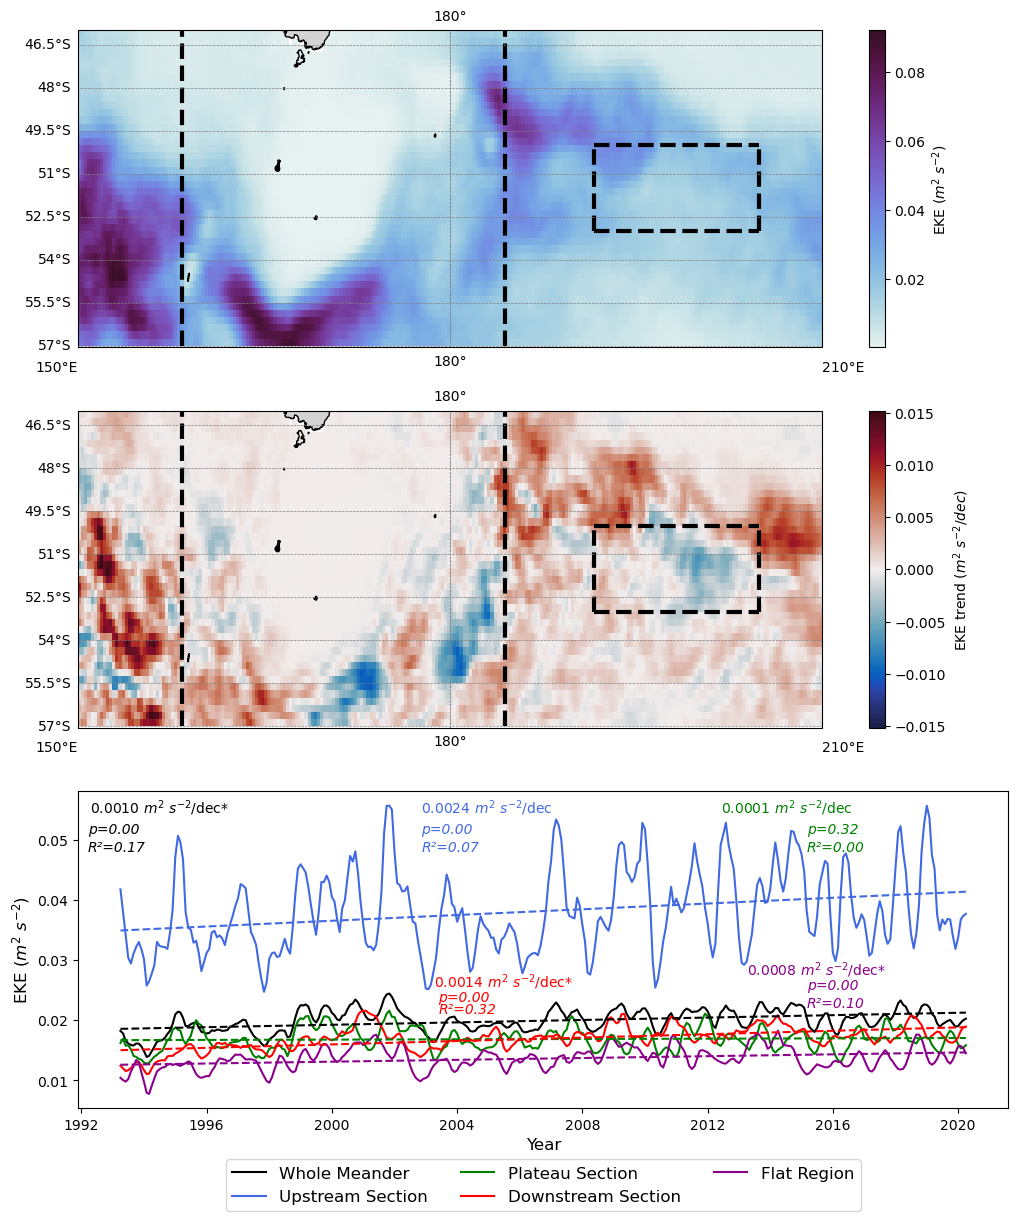

In [52]:
# Plot the three subplots of the EKE trends and spatial distributuons in the CP region

fig = plt.figure(figsize=(12, 14))  # Increased the figure size


# First subplot: spatial distribution of the 1993-2020 temporal mean EKE

ax1 = fig.add_subplot(3, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))
ax1.set_extent([lon_wh[0], lon_wh[1], lat_cp[0]+3.4, lat_cp[1]])
ax1.coastlines(resolution='10m')
ax1.add_feature(cfeature.LAND, facecolor='lightgray')
ax1.gridlines(draw_labels=True, linewidth=0.5, linestyle='--', color='gray')
ax1.text(lon_wh[0], -57.5, f'{lon_wh[0]}°E', transform=ccrs.PlateCarree(), ha='right', va='top', color='black')
ax1.text(lon_wh[1], -57.5, f'{lon_wh[1]}°E', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')

eke_1993_2020_mon_mean_wh_avg_tim.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='cmo.dense', add_colorbar=True, cbar_kwargs={'label': r'EKE ($m^2$ $s^{-2}$)'})
ax1.set_title('')
ax1.set_aspect('auto')  # Adjust the aspect ratio of the subplot

# Plot the longitude boundaries between the different sections
ax1.plot([158.4, 158.4], [-57, -46], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax1.plot([184.4, 184.4], [-57, -46], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream

# Plot the longitude and latitude boundaries of the Flat Region
ax1.plot([191.6, 191.6], [-53, -50], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax1.plot([204.9, 204.9], [-53, -50], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream
ax1.plot([191.6, 204.9], [-50, -50], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax1.plot([191.6, 204.9], [-53, -53], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream

#ax1.set_xlabel('Longitude', fontsize=12)
#ax1.set_ylabel('Latitude', fontsize=12)



# Second subplot: spatial distribution of the temporal trend for each spatial point in the CP region
ax2 = fig.add_subplot(3, 1, 2, projection=ccrs.PlateCarree(central_longitude=180))
ax2.set_extent([lon_wh[0], lon_wh[1], lat_cp[0]+3.4, lat_cp[1]])
ax2.coastlines(resolution='10m')
ax2.add_feature(cfeature.LAND, facecolor='lightgray')
ax2.gridlines(draw_labels=True, linewidth=0.5, linestyle='--', color='gray')
ax2.text(lon_wh[0], -57.5, f'{lon_wh[0]}°E', transform=ccrs.PlateCarree(), ha='right', va='top', color='black')
ax2.text(lon_wh[1], -57.5, f'{lon_wh[1]}°E', transform=ccrs.PlateCarree(), ha='left', va='top', color='black')

eke_1993_2020_mon_mean_cp_tre.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='cmo.balance', add_colorbar=True, cbar_kwargs={'label': r'EKE trend ($m^2$ $s^{-2}/dec$)'})
ax2.set_title('')
ax2.set_aspect('auto')  # Adjust the aspect ratio of the subplot

# Plot the longitude boundaries between the different sections
ax2.plot([158.4, 158.4], [-57, -46], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax2.plot([184.4, 184.4], [-57, -46], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream

# Plot the longitude and latitude boundaries of the Flat Region
ax2.plot([191.6, 191.6], [-53, -50], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax2.plot([204.9, 204.9], [-53, -50], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream
ax2.plot([191.6, 204.9], [-50, -50], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between upstream and plateau
ax2.plot([191.6, 204.9], [-53, -53], color='black', linestyle='--', linewidth=3.0, transform=ccrs.PlateCarree()) # Between plateau and downstream

#ax2.set_xlabel('Longitude', fontsize=12)
#ax2.set_ylabel('Latitude')



# Third subplot: time series of the EKE in different secions of the CP region over the 1993-2020 period
ax3 = fig.add_subplot(3, 1, 3)
ax3.plot(eke_1993_2020_mon_mean_wh_avg_lon_lat_no_nan.time, eke_1993_2020_mon_mean_wh_avg_lon_lat_no_nan, c='black', label='Whole Meander')
ax3.plot(eke_1993_2020_mon_mean_up_avg_lon_lat_no_nan.time, eke_1993_2020_mon_mean_up_avg_lon_lat_no_nan, c='royalblue', label='Upstream Section')
ax3.plot(eke_1993_2020_mon_mean_pl_avg_lon_lat_no_nan.time, eke_1993_2020_mon_mean_pl_avg_lon_lat_no_nan, c='green', label='Plateau Section')
ax3.plot(eke_1993_2020_mon_mean_dw_avg_lon_lat_no_nan.time, eke_1993_2020_mon_mean_dw_avg_lon_lat_no_nan, c='red', label='Downstream Section')
ax3.plot(eke_1993_2020_mon_mean_fl_avg_lon_lat_no_nan.time, eke_1993_2020_mon_mean_fl_avg_lon_lat_no_nan, c='darkmagenta', label='Flat Region')


# Plot the linear regression for the whole meander and its four sections

# Whole Meander: 
ax3.plot(eke_1993_2020_mon_mean_wh_avg_lon_lat_no_nan.time, reg_eke_1993_2020_mon_mean_wh, c='black', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_eke_1993_2020_mon_mean_wh_str = '{:.4f} $m^2$ $s^{{-2}}$/dec*'.format(slope_eke_1993_2020_mon_mean_wh*3.1536e+16*10)
p_eke_1993_2020_mon_mean_wh_str = 'p={:.2f}'.format(p_eke_1993_2020_mon_mean_wh)
r_squ_eke_1993_2020_mon_mean_wh_str = 'R\u00b2={:.2f}'.format(r_squ_eke_1993_2020_mon_mean_wh)

ax3.text(8130, 0.057, slope_eke_1993_2020_mon_mean_wh_str, ha='left', va='top', color='black', fontsize=10)
ax3.text(8110, 0.053, p_eke_1993_2020_mon_mean_wh_str, ha='left', va='top', color='black', fontstyle='italic', fontsize=10)
ax3.text(8110, 0.05, r_squ_eke_1993_2020_mon_mean_wh_str, ha='left', va='top', color='black', fontstyle='italic', fontsize=10)


# Upstream Section
ax3.plot(eke_1993_2020_mon_mean_up_avg_lon_lat_no_nan.time, reg_eke_1993_2020_mon_mean_up, c='royalblue', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_eke_1993_2020_mon_mean_up_str = '{:.4f} $m^2$ $s^{{-2}}$/dec'.format(slope_eke_1993_2020_mon_mean_up*3.1536e+16*10)
p_eke_1993_2020_mon_mean_up_str = 'p={:.2f}'.format(p_eke_1993_2020_mon_mean_up)
r_squ_eke_1993_2020_mon_mean_up_str = 'R\u00b2={:.2f}'.format(r_squ_eke_1993_2020_mon_mean_up)

ax3.text(12000, 0.057, slope_eke_1993_2020_mon_mean_up_str, ha='left', va='top', color='royalblue', fontsize=10)
ax3.text(12000, 0.053, p_eke_1993_2020_mon_mean_up_str, ha='left', va='top', color='royalblue', fontstyle='italic', fontsize=10)
ax3.text(12000, 0.05, r_squ_eke_1993_2020_mon_mean_up_str, ha='left', va='top', color='royalblue', fontstyle='italic', fontsize=10)


# Plateau Section
ax3.plot(eke_1993_2020_mon_mean_pl_avg_lon_lat_no_nan.time, reg_eke_1993_2020_mon_mean_pl, c='green', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_eke_1993_2020_mon_mean_pl_str = '{:.4f} $m^2$ $s^{{-2}}$/dec'.format(slope_eke_1993_2020_mon_mean_pl*3.1536e+16*10)
p_eke_1993_2020_mon_mean_pl_str = 'p={:.2f}'.format(p_eke_1993_2020_mon_mean_pl)
r_squ_eke_1993_2020_mon_mean_pl_str = 'R\u00b2={:.2f}'.format(r_squ_eke_1993_2020_mon_mean_pl)

ax3.text(15500, 0.057, slope_eke_1993_2020_mon_mean_pl_str, ha='left', va='top', color='green', fontsize=10)
ax3.text(16500, 0.053, p_eke_1993_2020_mon_mean_pl_str, ha='left', va='top', color='green', fontstyle='italic', fontsize=10)
ax3.text(16500, 0.05, r_squ_eke_1993_2020_mon_mean_pl_str, ha='left', va='top', color='green', fontstyle='italic', fontsize=10)


# Downstream Section
ax3.plot(eke_1993_2020_mon_mean_dw_avg_lon_lat_no_nan.time, reg_eke_1993_2020_mon_mean_dw, c='red', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_eke_1993_2020_mon_mean_dw_str = '{:.4f} $m^2$ $s^{{-2}}$/dec*'.format(slope_eke_1993_2020_mon_mean_dw*3.1536e+16*10)
p_eke_1993_2020_mon_mean_dw_str = 'p={:.2f}'.format(p_eke_1993_2020_mon_mean_dw)
r_squ_eke_1993_2020_mon_mean_dw_str = 'R\u00b2={:.2f}'.format(r_squ_eke_1993_2020_mon_mean_dw)

ax3.text(12150, 0.028, slope_eke_1993_2020_mon_mean_dw_str, ha='left', va='top', color='red', fontsize=10)
ax3.text(12200, 0.025, p_eke_1993_2020_mon_mean_dw_str, ha='left', va='top', color='red', fontstyle='italic', fontsize=10)
ax3.text(12200, 0.023, r_squ_eke_1993_2020_mon_mean_dw_str, ha='left', va='top', color='red', fontstyle='italic', fontsize=10)


# Flat region
ax3.plot(eke_1993_2020_mon_mean_fl_avg_lon_lat_no_nan.time, reg_eke_1993_2020_mon_mean_fl, c='darkmagenta', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_eke_1993_2020_mon_mean_fl_str = '{:.4f} $m^2$ $s^{{-2}}$/dec*'.format(slope_eke_1993_2020_mon_mean_fl*3.1536e+16*10)
p_eke_1993_2020_mon_mean_fl_str = 'p={:.2f}'.format(p_eke_1993_2020_mon_mean_fl)
r_squ_eke_1993_2020_mon_mean_fl_str = 'R\u00b2={:.2f}'.format(r_squ_eke_1993_2020_mon_mean_fl)

ax3.text(15800, 0.03, slope_eke_1993_2020_mon_mean_fl_str, ha='left', va='top', color='darkmagenta', fontsize=10)
ax3.text(16500, 0.027, p_eke_1993_2020_mon_mean_fl_str, ha='left', va='top', color='darkmagenta', fontstyle='italic', fontsize=10)
ax3.text(16500, 0.024, r_squ_eke_1993_2020_mon_mean_fl_str, ha='left', va='top', color='darkmagenta', fontstyle='italic', fontsize=10)

# Add panel (c)
#ax3.text(17900, 0.01, '(c)', ha='left', va='top', color='black', fontweight='bold', fontsize=12)

ax3.set_xlabel('Year', fontsize=12)
ax3.set_ylabel(r'EKE ($m^2$ $s^{-2}$)', fontsize=12)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.35), ncol=3, fontsize=12)

# Save the figure
fig.savefig(f'CP_region_eke_spa_tem_mean_spa_tem_tre_time_series.png', dpi=600, bbox_inches='tight')